<a href="https://colab.research.google.com/github/saikrishnareddypalle/Hotel-booking-analysis/blob/main/Final_Hotel_Booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!


## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15,10)})
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/Data files/Copy of Hotel Bookings.csv'

In [ ]:
df = pd.read_csv(path)

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Basic Data Analysis on Bookings

# 1) Let us find out the busiest month across the year, which gives us an idea of what month is the most preferred for customers

Text(0.5, 0, 'Month')

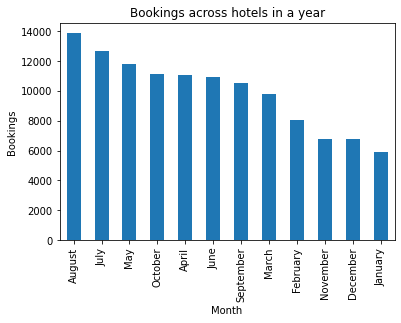

In [ ]:
busiest_month_df = df['arrival_date_month'].value_counts()
busiest_month_df

busiest_month_df.plot(kind = 'bar')
plt.title('Bookings across hotels in a year')
plt.ylabel('Bookings')
plt.xlabel('Month')

# After checking what time was the most preferred, let us also have a look at the type of hotels customers prefer

Text(0.5, 0, 'Type of Hotel')

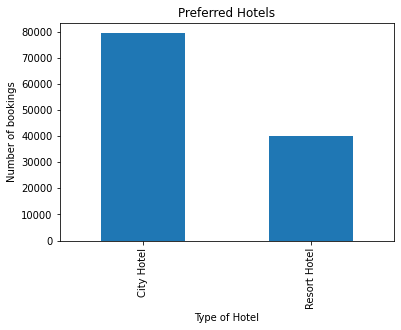

In [ ]:
preferred_hotel_df = df['hotel'].value_counts()
preferred_hotel_df

preferred_hotel_df.plot(kind = 'bar')
plt.title('Preferred Hotels')
plt.ylabel('Number of bookings')
plt.xlabel('Type of Hotel')

#Which distribution channel makes the highest contribution to bookings?

Text(0.5, 0, 'Channel')

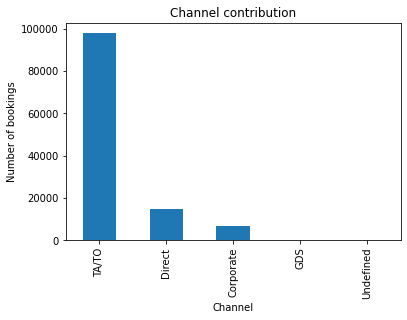

In [ ]:
channel_contribution_df = df['distribution_channel'].value_counts()
channel_contribution_df

channel_contribution_df.plot(kind = 'bar')
plt.title('Channel contribution')
plt.ylabel('Number of bookings')
plt.xlabel('Channel')

# **This gives us an insight into the most frequent cancellations from customers of a  particular country**

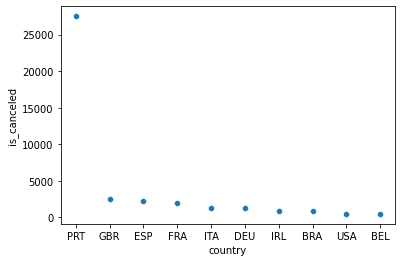

In [ ]:
cancellation_data_df = df.groupby('country')['is_canceled'].sum().sort_values(ascending = False)
sns.scatterplot(data = cancellation_data_df.head(10))

#Which market segment has the least number of days n the waiting list ?



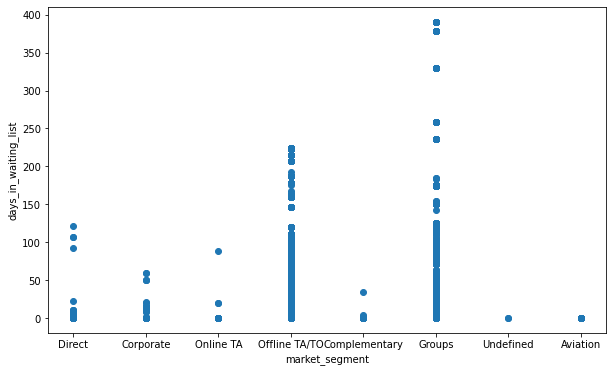

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['market_segment'], df['days_in_waiting_list'])
ax.set_xlabel('market_segment')
ax.set_ylabel('days_in_waiting_list')
plt.show()

# **Number of bookings across months for different hotels**

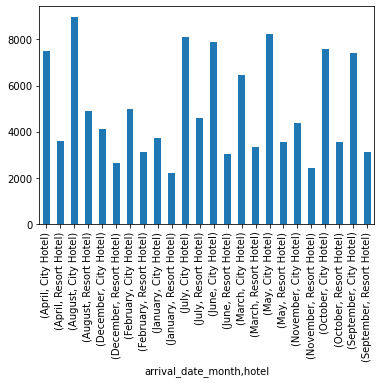

In [ ]:
df_hotelwise = df.groupby(['arrival_date_month','hotel']).size()
df_hotelwise.unstack()
df_hotelwise.plot(kind='bar')

#Customer Behavior Analysis


##We will begin by getting an idea about how each of the resort hotel and city hotel has performed for the given three years
<b>Note: we will use a new dataframe in which only non cancelled bookings are taken into account so that a true picture of booking trend is revealed</b>

In [ ]:
#Creating a copy of original dataframe using (.copy) method
new_df = df.copy()
#Create a dataframe which has only non-cancelled bookings
Non_cancelled_bookings = new_df[new_df['is_canceled']==0]

##There are 4 missing values in the children column, we can easily assume that those people brought no children to the party!
 <i>Okay so let's assume that and also let's get on with dropping columns</i>

In [ ]:
# Replace null values in children column with zero
new_df.loc[new_df.children.isnull(),'children'] = 0

In [ ]:
# Drop the columns which don't provide any usable information
new_df.drop(columns=['agent','company','arrival_date_week_number',
                     'reservation_status_date'],inplace=True)

#Let's get down to bussiness now!

##We will begin by getting an idea about how each of the resort hotel and city hotel has performed for the given three years
<b>Note: we will use a new dataframe in which only non cancelled bookings are taken into account so that a true picture of booking trend is revealed</b>

In [ ]:
#Create a dataframe which has only non-cancelled bookings
Non_cancelled_bookings = new_df[new_df['is_canceled']==0]

In [ ]:
#Hotel types that we have
Non_cancelled_bookings['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

##Let's just take both the hotels and have a look at the bookings that have been made in each one and see if the overall sales are in an uptrend or a downtrend.

In [ ]:
#Apply required boolean to filter out Resort Hotel
resort_hotel_sales = Non_cancelled_bookings[Non_cancelled_bookings['hotel']=='Resort Hotel']['arrival_date_year'].value_counts()
#Sort the series by years
resort_hotel_sales = resort_hotel_sales.sort_index()

#Apply the required boolean to filter out City Hotel
city_hotel_sales = Non_cancelled_bookings[Non_cancelled_bookings['hotel']=='City Hotel']['arrival_date_year'].value_counts()
#Sort by years
city_hotel_sales = city_hotel_sales.sort_index()

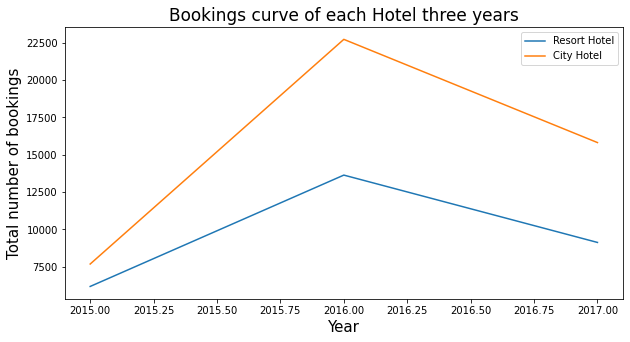

In [ ]:
#Create a figure of required size
plt.rcParams['figure.figsize'] = (10, 5)

# Create the plot object for resort Hotel
plt.plot(resort_hotel_sales,label='Resort Hotel')

# Create the plot object for City Hotel
plt.plot(city_hotel_sales,label='City Hotel')

#Give a title to the graph
plt.title('Bookings curve of each Hotel three years',fontdict = {'fontsize':17})

#Name x and y labels
plt.ylabel('Total number of bookings',fontdict = {'fontsize':15})
plt.xlabel('Year',fontdict = {'fontsize':15})

#To Display labels for each curve
plt.legend()

In a single glance we can see that no matter which year the overall bookings are more for City Hotel in comparison to Resort Hotel

We can also see that the bookings, (or sales because that's what they are) have fallen for both the hotels from the year 2016 onwards but for Resort Hotel they have fallen more sharply!

#It would also be beneficial to see a price trend in each hotel
 To get an idea we will just take the median price each hotel has asked over all the years combined

In [ ]:
#Obtain the median price
median_price = Non_cancelled_bookings.groupby('hotel')['adr'].median()


Text(0.5, 0, 'Hotel')

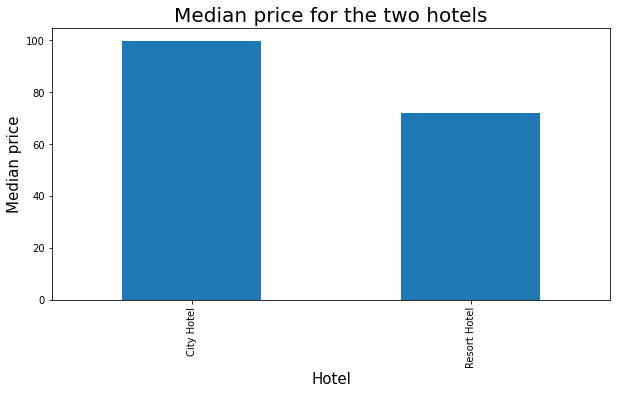

In [ ]:
#plot a bar graph for above data
plt.rcParams['figure.figsize'] = (10, 5)

median_price.plot(kind='bar')

#Give title and x,y labels
plt.title('Median price for the two hotels',fontdict = {'fontsize':20})
plt.ylabel('Median price',fontdict = {'fontsize':15})
plt.xlabel('Hotel',fontdict = {'fontsize':15})

So clearly it costs more to stay in a city hotel than in a resort hotel. This data is also in sync with our previous analysis in which we found out that the city hotel was in more demand than the resort hotel and obviously more the demand greater the price, <b>basic economics folks! </b>

#<b>Now let's go a bit deeper and see what kind of further exciting insights can we draw using our EDA of this dataframe which can ultimately be of benefit to a customer.</b> 
##Suppose you are from a country 'x' and you want to book a room for stay and you are confused about picking either  a resort hotel or a city hotel, then it does make sense to check what the folks from your own country are prefering the most. 
Here we try to see what people from top ten countries by bookings have chosen as their meal category.
choose the most only include those bookings which weren't cancelled at a later stage, In that case let's go ahead and do that.

In [ ]:
# Perform a groupby operation and obtain the value counts
hotel_vs_country = new_df[new_df['is_canceled']==0].groupby('country',as_index=True)['hotel'].value_counts()

In [ ]:
#Perform a sort on the produced series
hotel_vs_country = hotel_vs_country.sort_values(ascending=False)
#create a dataframe from the series
hotel_vs_country_df = pd.DataFrame(hotel_vs_country)

#Rename the only column the dataframe has as the no of bookings
hotel_vs_country_df.columns= ['no of bookings']


#We reset the index to make a full fledged dataframe
hotel_vs_country_df = hotel_vs_country_df.reset_index()

#Let's consider only top ten countries by bookings
hotel_vs_country_df.head(10)

,country,hotel,no of bookings
0,PRT,City Hotel,10879
1,PRT,Resort Hotel,10192
2,FRA,City Hotel,7081
3,GBR,Resort Hotel,5923
4,DEU,City Hotel,5012
5,GBR,City Hotel,3753
6,ESP,City Hotel,3285
7,ESP,Resort Hotel,3106
8,ITA,City Hotel,2054
9,IRL,Resort Hotel,1734


In [ ]:
my_df = hotel_vs_country_df.head(10)
city_hotel_df = my_df[my_df['hotel']=='City Hotel'][['country','no of bookings']]
resort_hotel_df = my_df[my_df['hotel']=='Resort Hotel'][['country','no of bookings']]

In [ ]:
city_hotel_df.set_index('country',inplace=True)
resort_hotel_df.set_index('country',inplace=True)

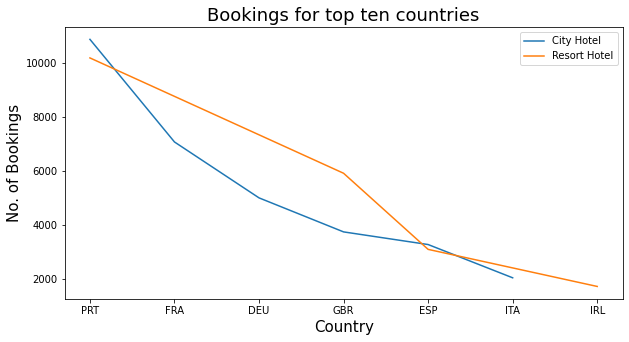

In [ ]:
#Draw a plot here
plt.rcParams['figure.figsize'] = (10,5)

plt.plot(city_hotel_df,label= 'City Hotel')
plt.plot(resort_hotel_df,label= 'Resort Hotel')

plt.xlabel('Country',fontdict={'fontsize':15})
plt.ylabel('No. of Bookings',fontdict={'fontsize':15})
plt.title('Bookings for top ten countries',fontdict={'fontsize':18})

plt.legend()

As we can clearly tell from the graph if you are from portugal your slightly better choice will be a city hotel over a resort hotel and vice-versa for a french, similarly we can check for other countries as well.

## If you are going to stay at a hotel and are paying hefty price in that order you better make sure that the food served at that place is of good quality.
 In order to do that we have a clue in the data, we will make use of meals column of our dataframe and find out what people are choosing to eat at a particular hotel, we can also relate it to a particular country and see if we can come up with a trend for each

In [ ]:
#Check what categories of meal feature do we have in the data
new_df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

##People at each hotel can choose from four categories of meals which they can book their respective stays with, let's briefly see what those are;
1. Undefined/SC – no meal package
2. BB – Bed & Breakfast 
3. HB – Half board (breakfast and one other meal – usually dinner)
4. FB – Full board (breakfast, lunch and dinner)

In [ ]:
#First perform a groupby 

popular_meal_category = new_df.groupby(['hotel'])['meal'].value_counts()
popular_meal_category


hotel         meal     
City Hotel    BB           62305
              SC           10564
              HB            6417
              FB              44
Resort Hotel  BB           30005
              HB            8046
              Undefined     1169
              FB             754
              SC              86
Name: meal, dtype: int64

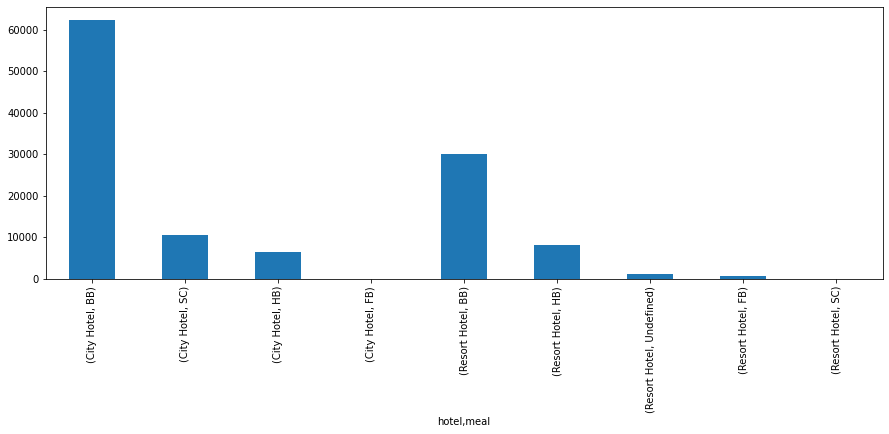

In [ ]:
#Define a figure size
plt.rcParams['figure.figsize'] = (15,5)
#Plot a bar graph
popular_meal_category.plot(kind= 'bar')



We have made you life really easy by creating the above chart, let me explain how. We have each hotel with respective food categories and the number of booking that people are doing in each hotel with each meal category, now it should not take you much long to figure out that be it Resort Hotel or city Hotel, people mostly prefer to go with the BB-category which is nothing more than bread and breakfast!

##Now that we are done with the meals, let's go ahead and check out the rooms. I am sure you will need our help to figure out which rooms you should choose and which ones you should not!

In [ ]:
#Check the room categories we have
new_df.reserved_room_type.nunique(),new_df.reserved_room_type.unique()

(10, array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object))

##As we can see we have ten different room categories and each category must be better suited for certain customers, so we will try to find that very thing. This is how we will proceed;

1. We will first take into consideration that only adults are staying in the hotel rooms and see if number of adults have a relation with rooms that they select.

2. We will next do the same for children and babies, if there are any.

In [ ]:
sorted(new_df.adults.unique())

[0, 1, 2, 3, 4, 5, 6, 10, 20, 26, 27, 40, 50, 55]

##Most of the travellers are either a single adult or a couple of adults, let's see if data can help us select better rooms for such travellers 

In [ ]:
#create a series with given boolen filtering
adults_less_than_3 = new_df[(new_df['adults'] == 1) |(new_df['adults'] == 2)]['reserved_room_type'].value_counts()

Text(0.5, 0, 'Room type')

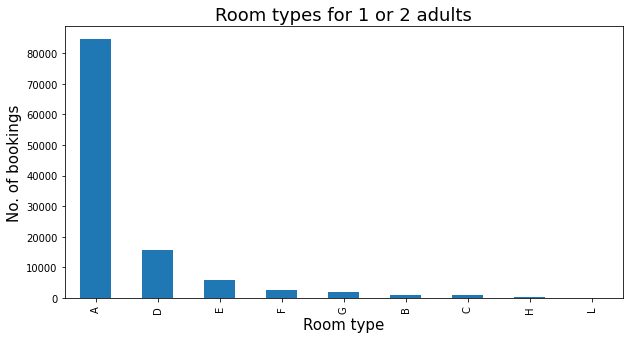

In [ ]:
#plot a bar graph to visualize the data
plt.rcParams['figure.figsize'] = (10, 5)

adults_less_than_3.plot(kind='bar')

#Give title and x,y labels
plt.title('Room types for 1 or 2 adults',fontdict = {'fontsize':18})
plt.ylabel('No. of bookings',fontdict = {'fontsize':15})
plt.xlabel('Room type',fontdict = {'fontsize':15})

Clearly such travellers have gone overwhelmingly with A-type rooms, there is no reason you shouldn't too!

##In case you are travelling with 3 adults 

Text(0.5, 0, 'Room type')

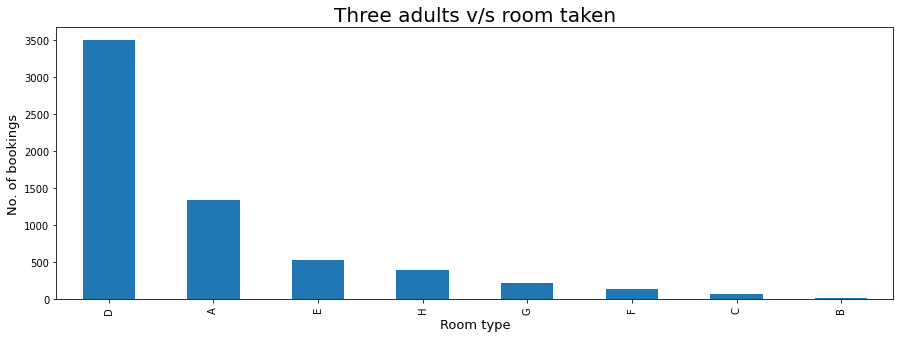

In [ ]:
#create a series with given boolen filtering
Three_adults = new_df[new_df['adults'] == 3]['reserved_room_type'].value_counts()
#plot a bar graph to visualize the data
plt.rcParams['figure.figsize'] = (15, 5)

Three_adults.plot(kind='bar')

#Give title and x,y labels
plt.title('Three adults v/s room taken',fontdict = {'fontsize':20})
plt.ylabel('No. of bookings',fontdict = {'fontsize':13})
plt.xlabel('Room type',fontdict = {'fontsize':13})

Hence room type-D is the most preffered room in this case followed by room type-A

##There aren't many people who are booking rooms for more than four people, but in case you are one of them you can easily choose from A,E,D room types in the same order of priority.

Text(0.5, 0, 'Room type')

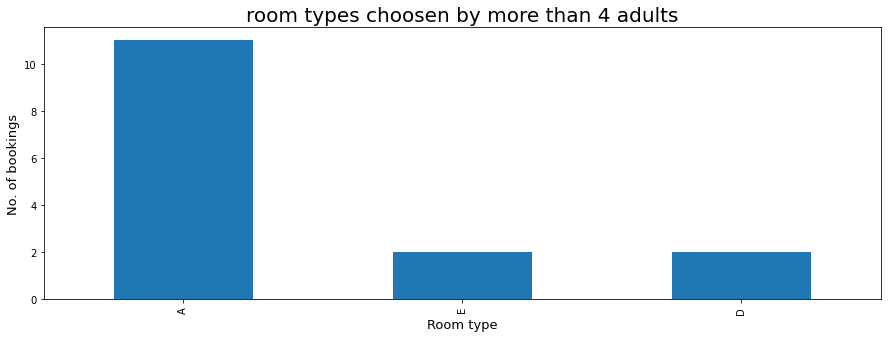

In [ ]:
#Create a series based on required boolean condition
more_adults = new_df[(new_df['adults'] >4) & (new_df['adults'] <55)]['reserved_room_type'].value_counts()
#plot a bar graph to visualize the data
plt.rcParams['figure.figsize'] = (15, 5)

more_adults.plot(kind='bar')

#Give title and x,y labels
plt.title('room types choosen by more than 4 adults',fontdict = {'fontsize':20})
plt.ylabel('No. of bookings',fontdict = {'fontsize':13})
plt.xlabel('Room type',fontdict = {'fontsize':13})

##If in case there are no adults checking in then we are left with children and babies, this is absolutely possible because adults can book rooms for their children at places they aren't themselves moving to. Let's just take a look at what data has to say about this!

In [ ]:
new_df[new_df['adults'] == 0][['children','babies',]]

,children,babies
2224,0.0,0
2409,0.0,0
3181,0.0,0
3684,0.0,0
3708,0.0,0
...,...,...
117204,2.0,0
117274,2.0,0
117303,2.0,0
117453,2.0,0


<i>As you might have expeced there are children without adults (of course there can be) but there are no babies (of course there can't be), makes sense right!</i>

#Now let's say you want to send your kids somewhere and they are alone in this, in order for them to make the most of their trip and enjoy every moment you would want the best for your kids. But how do you select the best, don't get carried away, *everything shall be answered through the data*, just stay with us!

In [ ]:
#Create a dataframe with the condition that only children are staying
children_only = new_df[new_df['adults'] == 0]['reserved_room_type'].value_counts()

children_only

B    211
A    131
D     23
E     17
P     12
F      5
G      3
C      1
Name: reserved_room_type, dtype: int64

Text(0.5, 0, 'Room type')

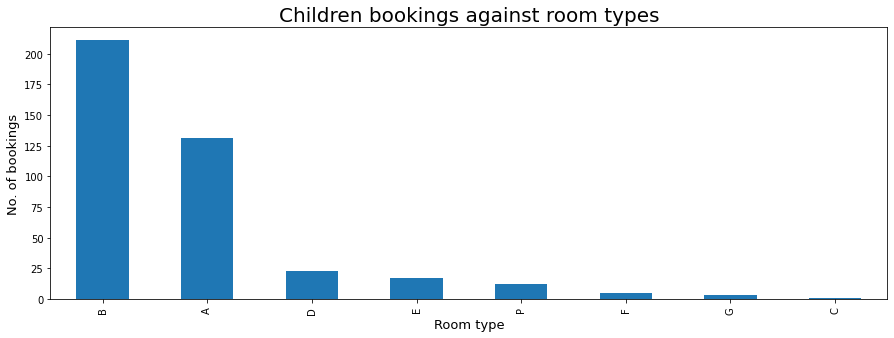

In [ ]:
#plot a bar graph for above data
plt.rcParams['figure.figsize'] = (15, 5)

children_only.plot(kind='bar')

#Give title and x,y labels
plt.title('Children bookings against room types',fontdict = {'fontsize':20})
plt.ylabel('No. of bookings',fontdict = {'fontsize':13})
plt.xlabel('Room type',fontdict = {'fontsize':13})

#Bar plot


Now the beautiful thing is that you don't need to be a data scientist to read this graph that we produced, results are pretty simple, if you are booking a hotel room for your kid Room-B will be the best choice for you only to be followed by Room-A, because that's where the big chunk of bookings is happening!

# Hotel Bookings Cancellation Analysis
Target Variable - Cancellations (column- is_canceled)   

#**Ques1:** What is the level of correlation between "is_canceled" variable and other variables of the Dataframe ?

**Firstly we are doing correlation analysis to understand the level of correlation of other int/float variables with cancellation.**

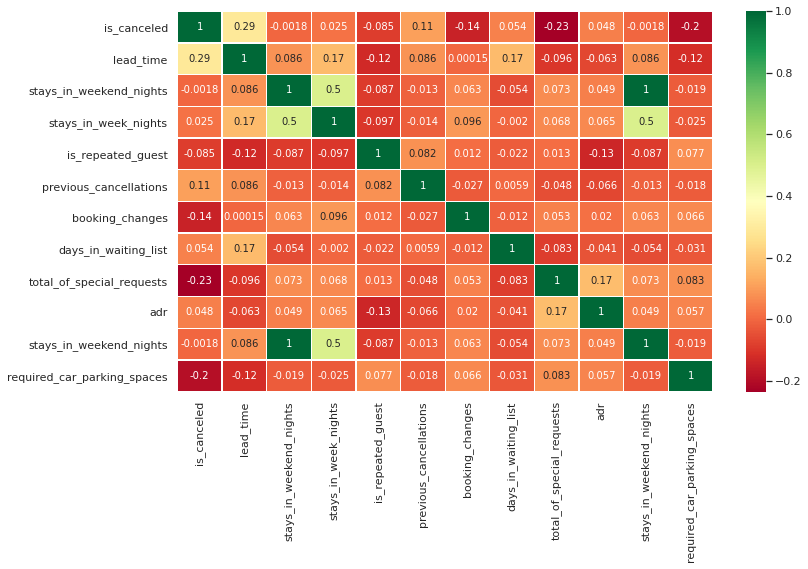

In [ ]:
# Taking out all the variables from the dataframe to check for their correlation with is_canceled


df_cor = pd.DataFrame(df.loc[:, ['is_canceled', 'lead_time','stays_in_weekend_nights', 'stays_in_week_nights', 'is_repeated_guest',\
                                 'previous_cancellations', 'booking_changes', 'days_in_waiting_list', 'total_of_special_requests',\
                                 'adr','stays_in_weekend_nights', 'required_car_parking_spaces' ]])
corrMatrix = df_cor.corr()


# so we can clearly observe that there is not any significant correlation between the variables.
fig, ax = plt.subplots(figsize = (12, 7))


sns.heatmap(corrMatrix, cmap ='RdYlGn', linewidths = 0.30, annot=True )
plt.show()

# Upon Observing the above heat map, we observe the following things:- 

1) lead_time is the only variable that has some significant level of positive correlation with is_cancelled feature


2) Most of the variables have insignificant level of correlation with the is_cancelled feature. 


3) Total_of_special_requests and required_car_parking_spaces have significant level of negative correlation with is_cancelled feature.

# **Conclusion -**

1) We can deduce that as lead time increases the chances of cancellation also rises. In other words, lead time and cancellation are directly proportional with each other.


2) We can also deduce that as number of special requests and car parking space increase, the chances of cancellation reduces. In other words, number of special requests and car parking space are inversely proportional with cancellation feature.


#**Ques2:** What are the percentage of cancellations in hotels? Which Hotel has the highest percentage of cancellations?

**Now let us look at the number of bookings and cancellations that took place in both the hotels, namely resort hotel and city hotel.**

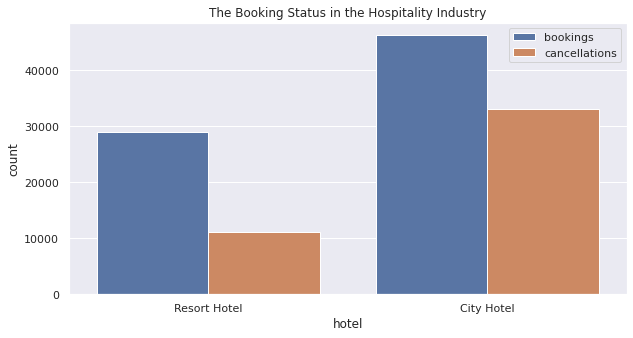

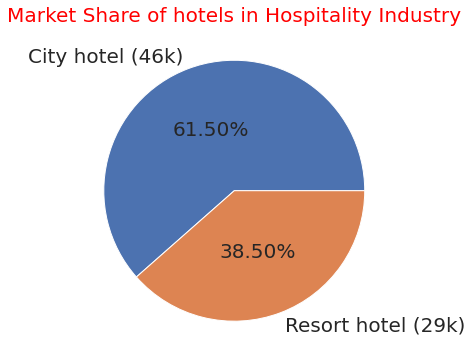

In [ ]:
# here the successful bookings are represented by 0 and cancellations are represented by 1.

b_ch = sns.countplot(data=df, x='hotel', hue='is_canceled')
b_ch.legend(['bookings','cancellations'])
b_ch.set(title='The Booking Status in the Hospitality Industry')
# we can clearly observe that the number of cancellations are quite large in City Hotel as compared to Resort Hotel.

# Now let us look at the market share of both the hotels.
df_hotel = df[df['is_canceled']==0]['hotel']
plt.figure(figsize=((6,6)))
plt.title(label='Market Share of hotels in Hospitality Industry',fontsize=20, color='red')
plt.pie(df_hotel.value_counts(), labels=['City hotel (46k)', 'Resort hotel (29k)'], autopct='%2.2f%%', pctdistance=0.5, textprops={'fontsize': 20})
plt.show()



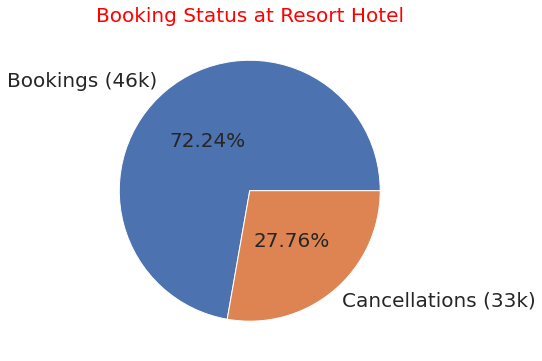

In [ ]:
# Resort Hotel Pie chart

df_resort_hotel = pd.DataFrame(df[df['hotel']== 'Resort Hotel'])
plt.figure(figsize=((6,6)))
plt.title(label='Booking Status at Resort Hotel',fontsize=20, color='red')
plt.pie(df_resort_hotel.is_canceled.value_counts(), labels=['Bookings (46k)','Cancellations (33k)'], autopct='%1.2f%%', pctdistance=0.5, textprops={'fontsize': 20})
plt.show()

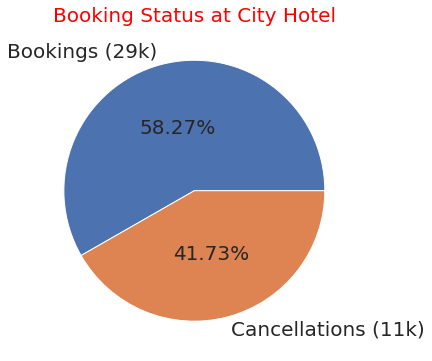

In [ ]:
# City Hotel Pie chart

df_resort_hotel = pd.DataFrame(df[df['hotel']== 'City Hotel'])
plt.figure(figsize=((6,6)))
plt.title(label='Booking Status at City Hotel',fontsize=20, color='red')
plt.pie(df_resort_hotel.is_canceled.value_counts(), labels=['Bookings (29k)','Cancellations (11k)'], autopct='%1.2f%%', pctdistance=0.5, textprops={'fontsize': 20})
plt.show()

# **Conclusion -**

From the above analysis we can conclude:

1) The Booking percentage of City Hotel (66.45%) is almost twice the pecentage of bookings in Resort Hotel(33.55%).

2) The Cancellation percentage of City Hotel are quite large(41.73%) as compared to the Resort Hotel Cancellations(27.76%), approximately half the bookings of City Hotel are cancelled.

#**Ques3:** Does Early Bookings with high lead time results in more cancellations by customers ?

In [ ]:
# First we will change the name of the column and replace the 0 and 1 values with string values.

df_new = df.rename(columns={'is_canceled':'Booking_Status'})
df_new['Booking_Status'].replace([0,1],['Booked', 'Cancellations'], inplace=True)

# The Booking and Cancellation patterns are quite same for both the hotels

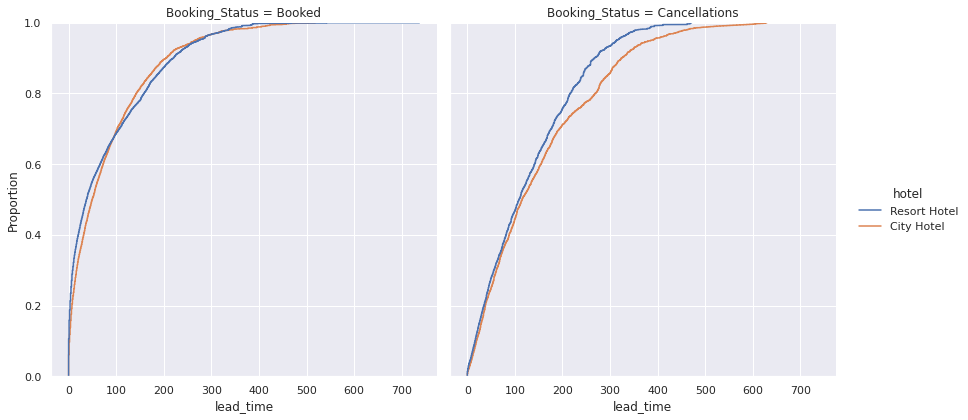

In [ ]:
sns.set(font_scale=1)

sns.displot(df_new, x="lead_time", col="Booking_Status", hue="hotel",height=6, kind="ecdf")

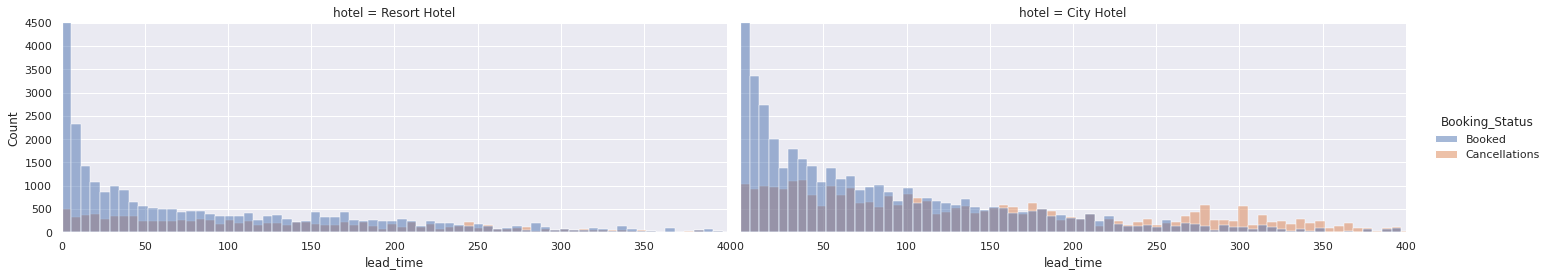

In [ ]:
y = sns.set(font_scale=1)

y = sns.displot(df_new, x="lead_time", col="hotel", hue="Booking_Status", height=4, aspect=2.5 )

y.set(xlim=(0, 400))
y.set(ylim=(0, 4500))


# From the Above displot we can infer the following things:-

1) As the lead time increase the proportion of cancellations with respect to the total bookings becomes higher.

2) It is visible that for both the hotels when the lead time is above 50 days, the chances of the bookings getting cancelled is more than 50%. 

# Conclusion -

We can conclude that as the lead time increase the probabilty of bookings getting canceled rises. Around the lead time of 150 days, the probability of booking getting canceled is more than the probability of customer staying at the hotel.


# **Assumption 1 - The cancellation rate must be higher incase the customer didn't get the room for which they reserved.**

**Forming another Variable Total_stay just to calculate the number of nights the customer stays in the hotel.**

In [ ]:
df_assign = df_new[df_new['reserved_room_type'] != df_new['assigned_room_type']]

df_assign = df_assign.drop(columns=['lead_time',	'arrival_date_year',	'arrival_date_month',	'arrival_date_week_number',\
                        'arrival_date_day_of_month',	'stays_in_weekend_nights','stays_in_week_nights',	'adults',\
                        'children',	'babies',	'meal',	'country',	'market_segment','distribution_channel',\
                        'is_repeated_guest',	'previous_cancellations',	'previous_bookings_not_canceled'])
df_assign.head(2)


,hotel,Booking_Status,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2,Resort Hotel,Booked,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
12,Resort Hotel,Booked,D,E,0,No Deposit,240.0,NaN,0,Transient,97.0,0,3,Check-Out,2015-07-05


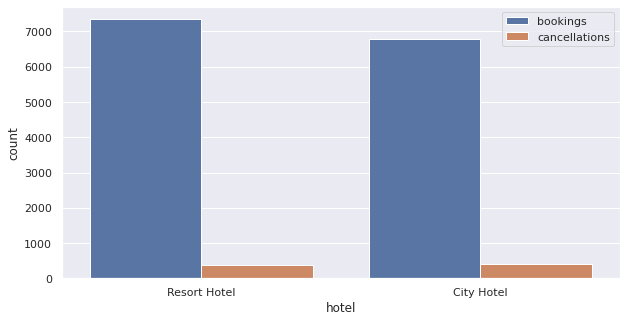

In [ ]:
b_ch = sns.countplot(data=df_assign, x='hotel', hue='Booking_Status')
b_ch.legend(['bookings','cancellations'])

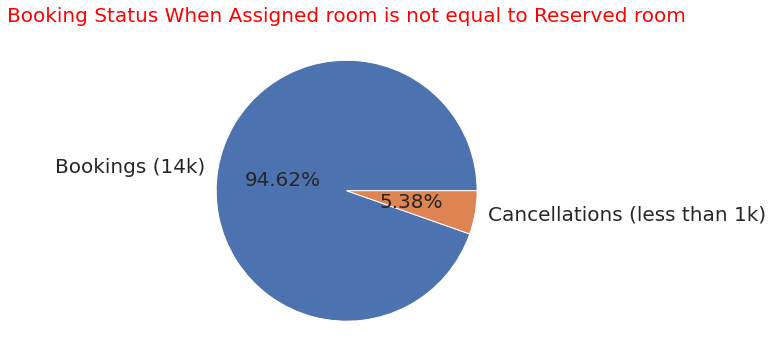

In [ ]:
plt.figure(figsize=((6,6)))
plt.title(label='Booking Status When Assigned room is not equal to Reserved room',fontsize=20, color='red')
plt.pie(df_assign.Booking_Status.value_counts(), labels=['Bookings (14k)','Cancellations (less than 1k)'], autopct='%1.2f%%', pctdistance=0.5, textprops={'fontsize': 20})
plt.show()

In [ ]:
df_assign1 = df_new[df_new['reserved_room_type'] == df_new['assigned_room_type']]

df_assign1 = df_assign1.drop(columns=['lead_time',	'arrival_date_year',	'arrival_date_month',	'arrival_date_week_number',\
                        'arrival_date_day_of_month',	'stays_in_weekend_nights','stays_in_week_nights',	'adults',\
                        'children',	'babies',	'meal',	'country',	'market_segment','distribution_channel',\
                        'is_repeated_guest',	'previous_cancellations',	'previous_bookings_not_canceled'])
df_assign1.head(2)


,hotel,Booking_Status,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,Booked,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,Booked,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01


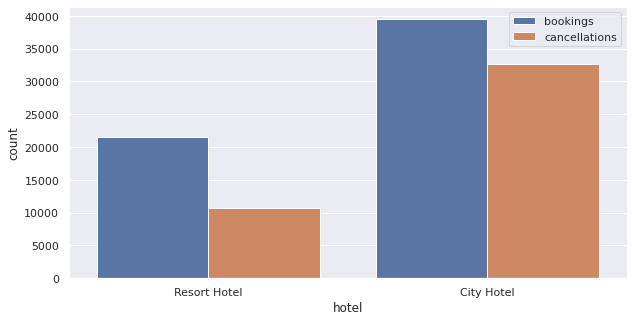

In [ ]:
b_ch = sns.countplot(data=df_assign1, x='hotel', hue='Booking_Status')
b_ch.legend(['bookings','cancellations'])

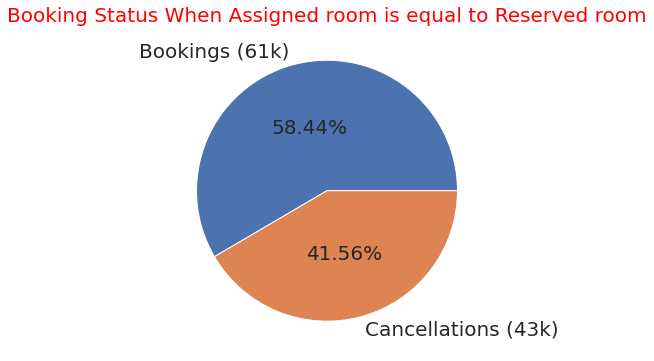

In [ ]:
plt.figure(figsize=((6,6)))
plt.title(label='Booking Status When Assigned room is equal to Reserved room',fontsize=20, color='red')
plt.pie(df_assign1.Booking_Status.value_counts(), labels=['Bookings (61k)','Cancellations (43k)'], autopct='%1.2f%%', pctdistance=0.5, textprops={'fontsize': 20})
plt.show()

# Conclusion - 
**Thus our assumption is wrong, cancellation rates do not depend upon whether the customer could get the room that he reserved for while booking.**

# **Assumption 2 - There is more cancellation among new customers as compared to repeated customers.**

In [ ]:
df_new2 = df_new.rename(columns={'is_repeated_guest':'Type_of_customer'})
df_new2['Type_of_customer'].replace([0,1],['New Customer', 'Repeated customer'], inplace=True)
df_new2 = df_new2.loc[:, ['hotel', 'Booking_Status', 'Type_of_customer', 'arrival_date_month']]
df_new2

,hotel,Booking_Status,Type_of_customer,arrival_date_month
0,Resort Hotel,Booked,New Customer,July
1,Resort Hotel,Booked,New Customer,July
2,Resort Hotel,Booked,New Customer,July
3,Resort Hotel,Booked,New Customer,July
4,Resort Hotel,Booked,New Customer,July
...,...,...,...,...
119385,City Hotel,Booked,New Customer,August
119386,City Hotel,Booked,New Customer,August
119387,City Hotel,Booked,New Customer,August
119388,City Hotel,Booked,New Customer,August


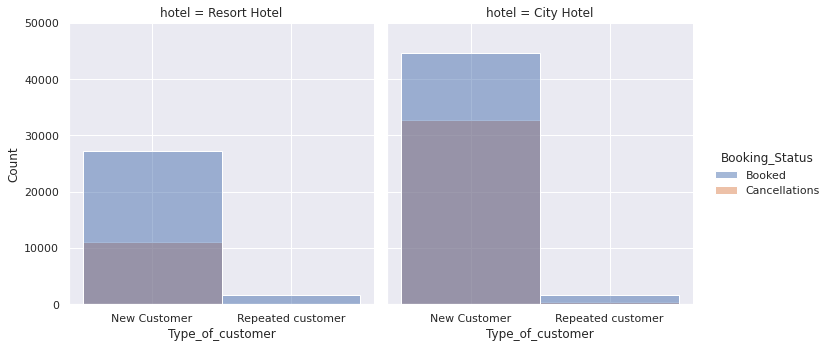

In [ ]:
y = sns.set(font_scale=1)

y = sns.displot(df_new2, x="Type_of_customer", col="hotel", hue="Booking_Status", height=5, aspect=1)

y.set(ylim=(0, 50000))

# Conclusion- 

**Our Assumption was correct there is large number of cancellations from new customers as compared to repeated customers.**

# Asssumption 3- The number of cancellation rates remains constant across the months.

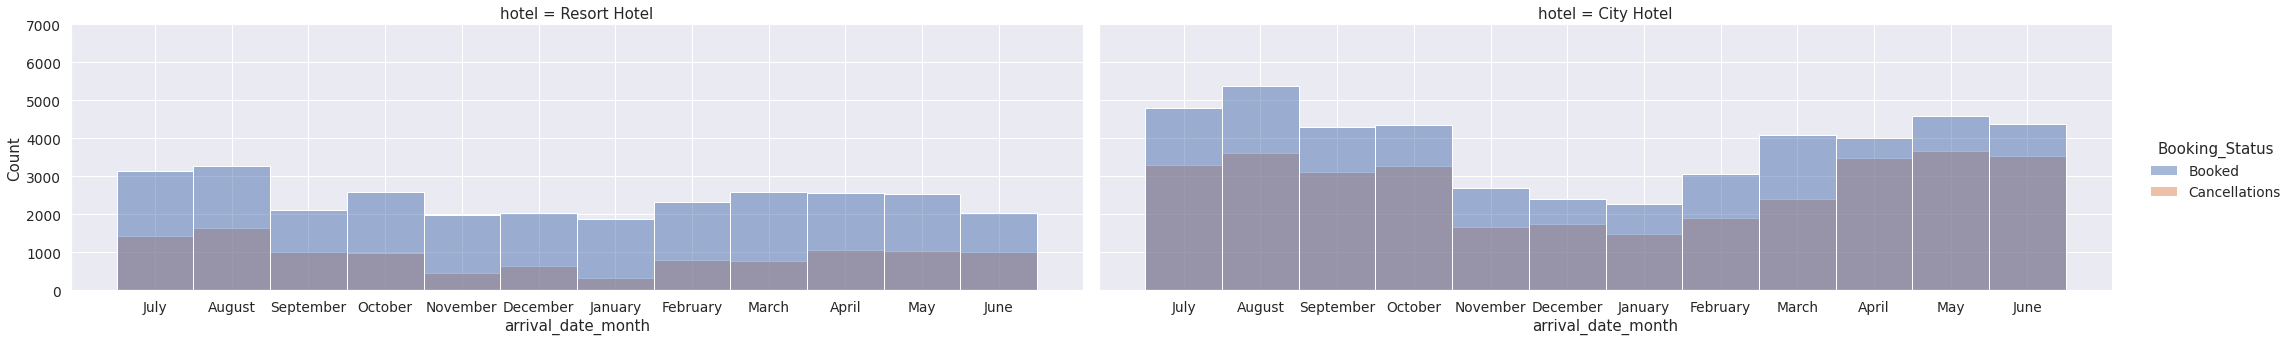

In [ ]:
y = sns.set(font_scale=1.25)

y = sns.displot(df_new2, x="arrival_date_month", col="hotel", hue="Booking_Status", height=5, aspect=3 )

y.set(ylim=(0, 7000))

# Conclusion - 

**We can clearly see that the cancellation happens in all the months of the year and we can't see any huge concentration of cancellations in any particular months for both the hotels.**

#Multivariate Analysis on Distribution Channels, Across Months.

#Hypothesis 1: Average monthly ADR generated by ‘Direct’  distribution channel would be the highest across all months since distribution channels such as ‘Corporate’, ‘TA/TO’ and ‘GDS’ rely on discounted pricing.s.

In [ ]:
df_adr = df.groupby(['arrival_date_month','distribution_channel'])['adr'].mean().unstack()

In [ ]:
df_adr = df_a.fillna(0)

#Test 1: Studying variation of average monthly ADR generated by each distribution channel across all months, plotted on a scatter plot with trend lines.

[Text(0, 0.5, 'Average ADR/Month')]

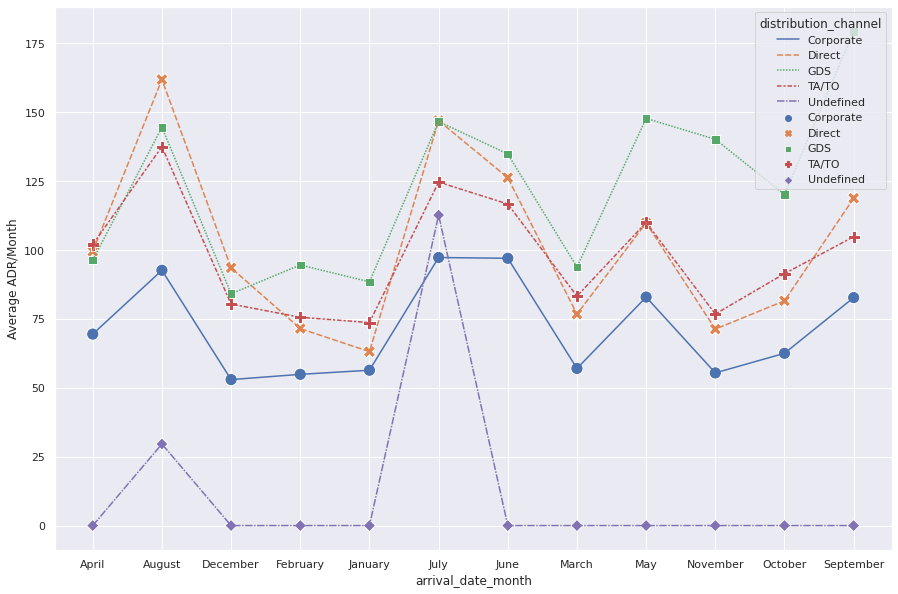

In [ ]:
g = sns.scatterplot(data = df_adr,s=150)
f = sns.lineplot(data = df_adr)
f.set(ylabel='Average ADR/Month')

#Analysis: 
1. AM-ADR generated from ‘Direct’ channel doesn’t remain the highest across all months. 

2. For the months of February and January, it is taken over by AM-ADR generated by ‘GDS’ and ‘TA/TO’. 

3. For the months of June, March, May, November, October  and September AM-ADR from ‘GDS’ remains higher than ‘Direct’ channel. 

4. AM-ADR for ‘Direct’ channel remain almost equal to the AM-ADR generated by ‘TA/TO’. But for the month of September, AM-ADR from ‘Direct’ channels exceeds AM-ADR generated from ‘TA/TO’ channe

#Conclusion:
The hypothesis is only partially true. ‘Direct’, ‘GDS’ and ‘TA/TO’ channels deliver highest AM-ADR across all the months.

#Hypothesis 2: ‘Corporate’ distribution channel should consistently deliver most number of repeated guests per month, since business related affairs are recurring in nature.

In [ ]:
df_rep_guests = df.groupby(['arrival_date_month','distribution_channel'])['is_repeated_guest'].sum().unstack()

In [ ]:
df_rep_guests = df_b.fillna(0)

#Test 2: Studying variations in number of repeated guests delivered by each distribution channel across all months, plotted on a scatter plot with trend lines.

[Text(0, 0.5, 'Number of Repeated Guests')]

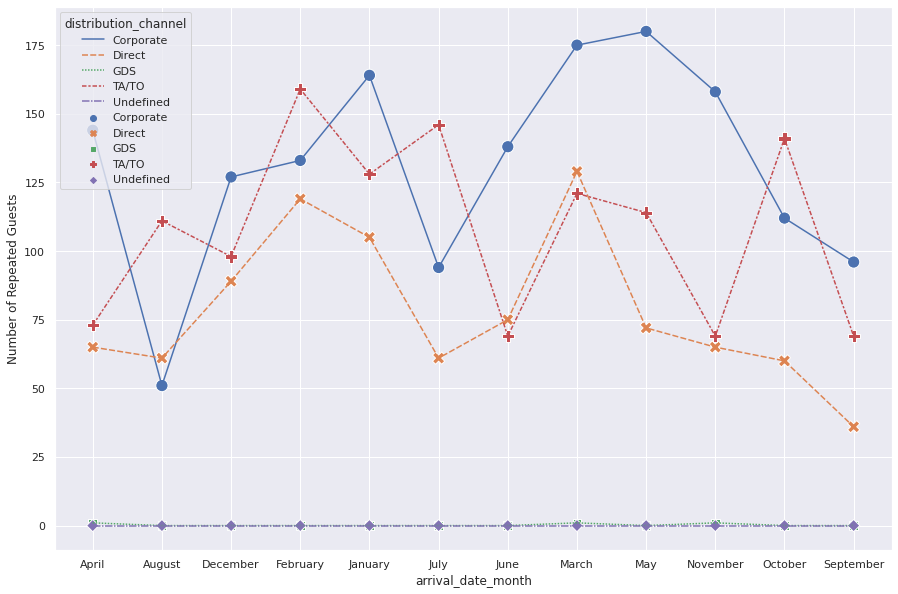

In [ ]:
g = sns.scatterplot(data = df_rep_guests,s=150)
f = sns.lineplot(data = df_rep_guests)
f.set(ylabel='Number of Repeated Guests')  #not actual plot below, only image. 

#Analysis: 
1. Number of repeated guests, remains highest for ‘Corporate’ distribution channel for most of the months.

2. For the months of August, February, July and October the number of repeated guests delivered by ‘TA/TO’ channel is highest and exceeds the number of repeated guests delivered by ‘Corporate’ channel

#conclusion:
The hypothesis is partially true. ‘Corporate’ distribution channel sends the most number of repeated guests for all months except four (August, February, July and October) 

#Hypothesis 3: Cancellation percentage for guests delivered through ‘TA/TO’ channel should be the high across all months, since agents and operators sell holiday packages which can change as per customer's conveniences.


In [ ]:
df_cancel_atge = df.groupby(['arrival_date_month','distribution_channel']).agg({'is_canceled':['count','sum']})
df_cancel_atge['cancel_percent'] = (df_cancel_atge['is_canceled'].loc[:,'sum']/df_cancel_atge['is_canceled'].loc[:,'count'])*100
df_cancel_atge.drop('is_canceled',axis=1,inplace=True)
df_cancel_atge = df_cancel_atge.unstack().fillna(0)
df_cancel_atge[['Corporate', 'Direct','GDS','TA/TO','Undefined']] = df_cancel_atge.cancel_percent.loc[:,:'undefined']
df_cancel_atge.drop('cancel_percent',axis = 1,inplace=True)

#Test 3: Studying variations in cancellation percentages for each distribution channel across all months, plotted on a scatter plot with trend lines.

[Text(0, 0.5, 'Cancellation Percentatges')]

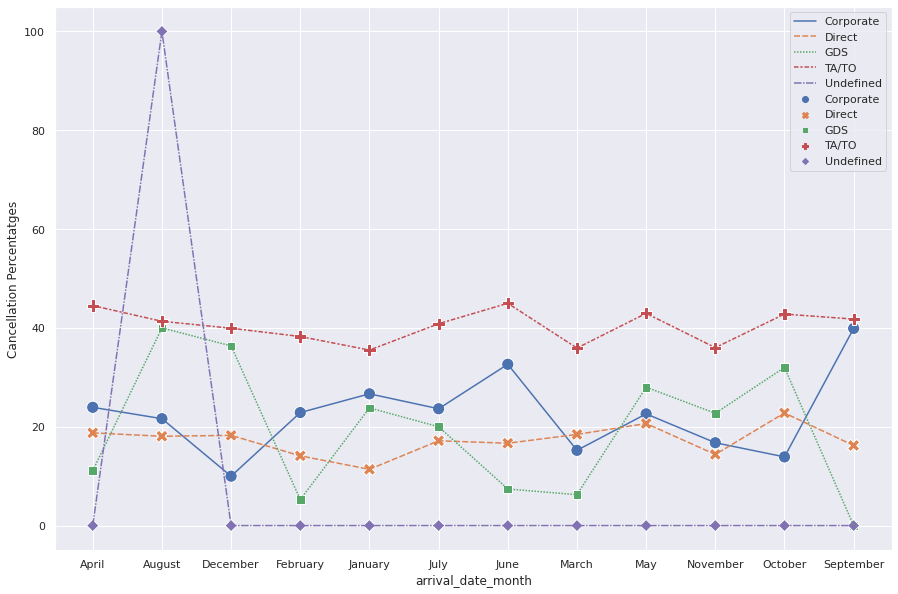

In [ ]:
g = sns.scatterplot(data = df_cancel_atge,s=150)
f = sns.lineplot(data = df_cancel_atge)
f.set(ylabel='Cancellation Percentatges') #not actual plot below, only image. 

#Analysis: 
1. Cancellation percentage for guests delivered by ‘TA/TO’ channel remains constantly the highest across all months.

2. For the month of August, ‘Undefined’ channel has the highest cancellation percentage, higher than ‘TA/TO’ channel.

3. For the month of August, cancellation percentage for ‘GDS’ channel is almost equal to the cancellation percentage for ‘TA/TO’ channel.

4. For the month of September, cancellation percentage for ‘Corporate’ channel is almost equal to the cancellation percentage for ‘TA/TO’ channel.

#Conclusion: 
The hypothesis remains largely true, except for the month of August, which is an anomaly in a largely true trend.

#Hypothesis 4: Guests delivered by ‘TA/TO’ channel should make the highest special requests, consistently across all months, since agents and operators sell holiday packages which can change as per customer’s conveniences.

In [ ]:
df_spec_request = df.groupby(['arrival_date_month','distribution_channel'])['total_of_special_requests'].sum().unstack()

#Test 4: Studying variations in number of special requests for each distribution across months, plotted on a scatter plot with trend line.

[Text(0, 0.5, 'Number of special requests')]

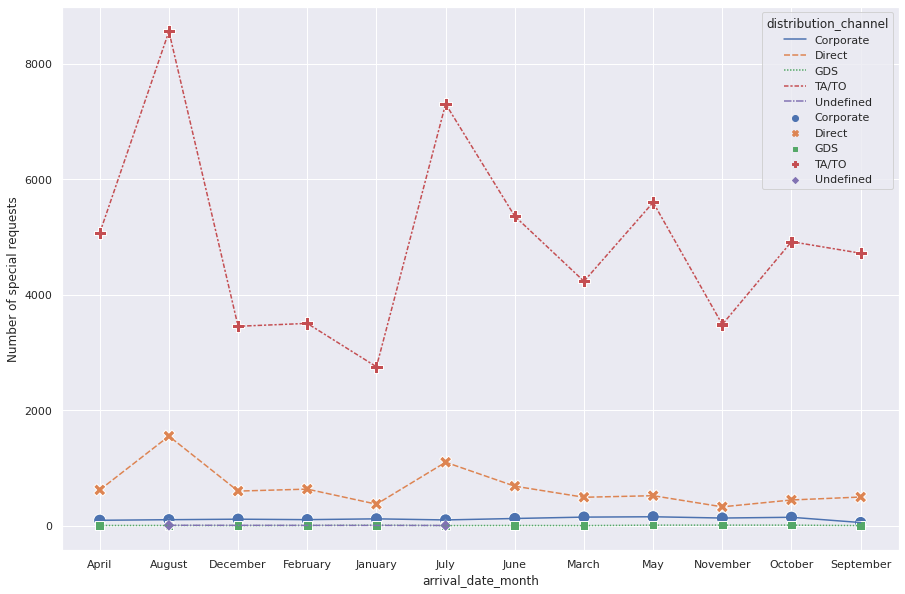

In [ ]:
g = sns.scatterplot(data = df_spec_request,s=150)
f = sns.lineplot(data = df_spec_request)
f.set(ylabel='Number of special requests') #not actual plot below, only image. 

#Analysis: 
1. Guests, delivered through agents and operators, consistently make the highest special requests across all months.

2. Guests, delivered through ‘Direct’ channel, consistently make the second-highest number of special requests across all mo

#Conclusion: 
The hypothesis is, thus, true in its entirety.

#Actionable Insights: Suggestions based upon insights to build a sound marketing strategy.

1. ‘Direct’, ‘GDS’ and ‘TA/TO’ channels deliver highest AM-ADR across all the months. More monthly marketing budget could be allocated to these channels to maximize AM-ADR.

2. ‘Corporate’ channel delivers most repeated guests. New Letters, updates and other promotional material should be sent to corporate clients, monthly to keep in touch with them and to further increase the number of repeated guests.

3. Cancellation percentages are consistently high for ‘TA/TO’ channel across all months. A deposit should be taken from guests delivered by ‘TA/TO’ distribution channel to cut down losses and operational inefficiencies.

4. ‘TA/TO’ channel delivers guests who make the most special requests across all months, followed by guests delivered by  ‘Direct’ channel. Special requests add to the revenue of the hotel and so, customers from ‘TA/TO’ and ‘Direct’ channel should be offered to avail special requests by the staff as frequently as possible to increase the special requests that are made